[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Concepts/Python/Frequentist%20Versus%20Bayesian%20Approaches.ipynb)

# Definition

Debates between frequentists and Bayesians have carried on for years, touching on issues that are in some cases very [practical](https://www.ejwagenmakers.com/2008/BayesFreqBook.pdf) and other cases much more [philosophical](http://www.stat.columbia.edu/~gelman/research/published/philosophy.pdf). The goal here is not to dive deeply into all of those debates but rather to introduce you to the basic issues, because they are at the heart of what we can and cannot do with statistics.

More specifically, the two camps differ fundamentally on how to interpret randomness, which profoundly affects the kinds of inferences that can be drawn on the basis of noisy data:

A **frequentist** thinks of probability only in terms of the frequency of many repeated events that include some element of randomness. **To a frequentist, assigning a probability to a singular event that can either happen or not happen, particularly one that is not directly or yet measured,  is nonsensical** ("There is no place in our system for speculations concerning the probability that the sun will rise tomorrow" -- William Feller). As a consequence of these ideas, a frequentist operates on the conditional distribution of the data, assuming that a hypothesis is true. That is, one makes a series of repeated measurements (the data) under fixed conditions, obtaining what is essentially a histogram. Inferences about the nature of the process that generated the data then allow only for this definition of randomness or uncertainty: the obtained variability in the data. Questions of the form "What is the probability that process x generated my data?" are undefined in this framework, because a probability cannot be assigned to an unknown and unseeable process (or "hypothesis"), only to repeated measures. Instead, the best you can do is simply assume that a particular process was the one that generated your data, and then ask "What is the probability that I would have obtained my data, assuming that x was the true process?" This question is the basis for null hypotheses (typically defined in terms of the parameters of the probability distribution that you would expect the data to be drawn from under a particular set of assumptions) and p-values: computing the likelihood p(data | null hypothesis).

Benefits of this approach are that frequentist-based statistics are typically relatively easy to compute, they require few assumptions, and they tend to promote good experimental design (because you need to very carefully control the conditions under which the data are collected).

Drawbacks include the fact that definitions of probability in this framework are often highly counter-intuitive to how most of us think, resulting in results that can be very difficult to interpret. A good example is the concept of a "confidence interval" in frequentist statistics, which is described nicely [here](https://jfiksel.github.io/2018-01-08-explaining-confidence-intervals/).

A **Bayesian** thinks of probability as the degree of belief in a proposition (or hypothesis). In this framework, data represent evidence that can support or oppose such a belief, which is represented as a  probability distribution. Thus, unlike from the frequentist perspective, **from the Bayesian perspective it is perfectly natural to describe the belief (or probability) that particular values of particular parameters of a particular probability distribution (together encompassing a "hypothesis" about the data) are true**.

These ideas are derived directly from the definition of joint probability (see [Independence and Lack Thereof](https://colab.research.google.com/drive/1YFwKKkWUjtV6_Nx2upNpFYHJNeXIeQB6) for a related discussion):

$P(A\cap B)=p(A|B)\times p(B) = p(B|A)\times p(A)$

where $P(A\cap B)$ is read as "the probability that A and B are true" and P(A | B) is read as "the probability that A is true, given that B is true" or just "the probability of A given B."

If we call A the Hypothesis and B the Data, and rearrange, we get Bayes' Rule:

$P(Hypothesis|Data)=\frac{P(Data|hypothesis)\times P(Hypothesis)}{P(Data)}$

Where *P*(*Hypothesis* | *Data*) is called the posterior probability (or just posterior), *P*(*Data* | *Hypothesis*) is the likelihood, *P*(*Hypothesis*) is the prior, and *P*(*Data*) is the marginal probability of the data.

Benefits of the Bayesian approach are that it tends to get at the intuitive concepts that one is addressing (e.g., the probability that a hypothesis is true, given the data), and it does so in a rigorous manner.

Drawbacks include questions about [how to identify an appropriate prior](https://stats.stackexchange.com/questions/78606/how-to-choose-prior-in-bayesian-parameter-estimation).


# Tutorial and Exercises

To use this tutorial, read the text and then try to generate code to solve the exercises. Answers will be posted to GitHub after the class they are due.

The learning objective is to gain insights into thinking about inference from a "Frequentist" versus a "Bayesian" perspective. In brief, because a Frequentist does not consider the probability of an event or state of the world or hypothesis, only their frequency of occurrance, it is not possible to ask questions of the form "what is the probabilty that hypothesis x is true?" Instead, one can only consider questions of the form, "what is the probabilty that I would have obtained my data, given that hypothesis x is true?" In contrast, Bayesians consider the probabilities of such things (often called the strength of belief), but doing so can require making assumptions that can be difficult to prove.

Let's start with a simple example, taken from:

https://en.wikipedia.org/wiki/Base_rate_fallacy#Example_1:_HIV

"Imagine running an HIV test on A SAMPLE of 1000 persons ..."

"The test has a false positive rate of 5% (0.05)..." i.e., the probability that someone who takes the test gets a POSITIVE result despite the fact that the person does NOT have HIV

"...and no false negative rate." i.e., The probability that someone who takes the test gets a NEGATIVE result despite the fact that the person DOES have HIV.

Answers to the exercises below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

### Exercise #1: If someone gets a positive test, is it "statistically significant" at the p<0.05 level? Why or why not?

It is meaningless to speak of "statistical significance" without specifying null and alternative hypotheses. For a given positive HIV test, one might pose the hypotheses:

*   $H_0:$ person is HIV negative (Type I error, i.e. false positive)
*   $H_1:$ person is HIV positive (correct inference, i.e. true positive)


Assuming a false positive rate of 5% for the HIV test, the p-value of a null hypothesis significance test is $0.05 = P(\text{Positive test} | H_0 = True)$. We fail to reject $H_0$ at the p < 0.05 level.


### Exercise #2: What is the probability that if someone gets a positive test, that person is infected?

Following on Exercise #2, let's do the same thing, but this time we will try different values for the proportion of the population that is actually infected. What you should notice is that the **PROPORTION INFECTED GIVEN A POSITIVE TEST** depends (a lot!) on the **OVERALL RATE OF INFECTION**. Put another way, to determine the probabilty of a hypothesis, given your data (e.g., proportion infected given a positive test), you have to know the probability that the hypothesis was true without any data.

Why is this the case? It is a simple consequence of the definition of a conditional probability, formulated as Bayes' Rule. Specifically, the joint probability of two events, call them A and B, is defined as: $$p(A\,and\,B) = p(A) \times p(B\,|\,A)$$ $$p(B\,and\,A) = p(B) \times p(A\,|\,B)$$

Now, calling A the Hypothesis and B the Data, then rearranging, we get:$$p(Hypothesis\,|\,Data) = \frac{p(Data\,|\,Hypothesis) \times p(Hypothesis)}{p(Data)}$$

So you cannot calculate the probability of the hypothesis, given the data (i.e., the Bayesian posterior), without knowing the probability of the hypothesis independent of any data (i.e., the prior).

For this exercise, assume a range of priors (infection rates) from 0 to 1 in steps of 0.1.

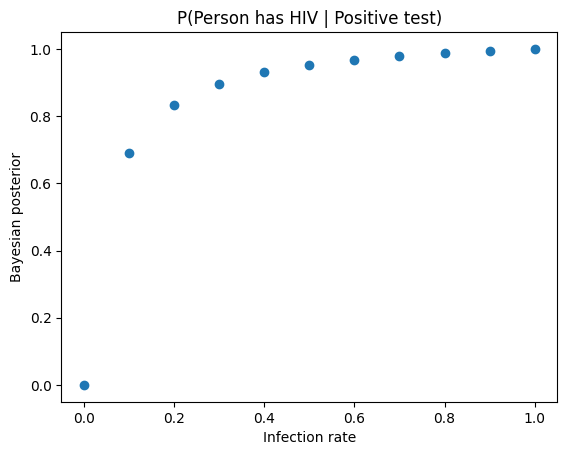

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
Question: What is the probability that a person is infected given that they have a positive test?
  - Hypothesis: A person is infected
  - Data: A person has a positive HIV test result
'''

# P(Positive test | Person has HIV)
p_data_given_hypothesis = 1

# Populate a dictionary containing Bayesian posteriors for each infection rate
p_hypothesis_given_data = {}
for infection_rate in np.linspace(0,1,11):

  # P(Positive test) = P(Positive test | Person has HIV)*P(Person has HIV) + P(Positive test | Person does not have HIV)*P(Person does not have HIV)
  # P(Positive test) = (1 - False negative rate)*(Infection rate) + (False positive rate)*(1 - Infection rate)
  p_data = 1*infection_rate + 0.05*(1-infection_rate)

  # Compute Bayesian posterior
  p_hypothesis_given_data[infection_rate] = (p_data_given_hypothesis*infection_rate)/p_data

'''
I then gave the following prompt to ChatGPT:

"Suppose i have a Python dictionary called 'p_hypothesis_given_data', where
- the key is an infection rate
- the value is the Bayesian posterior.
Convert this dictionary into a pandas data frame."

The prompt yeilded the following line:
'''
p_hypothesis_given_data_df = pd.DataFrame(list(p_hypothesis_given_data.items()), columns=['Infection Rate', 'Bayesian Posterior'])

# Lastly, I plotted these data using matplotlib
plt.scatter(x=p_hypothesis_given_data_df['Infection Rate'], y=p_hypothesis_given_data_df['Bayesian Posterior']);
plt.xlabel('Infection rate')
plt.ylabel('Bayesian posterior')
plt.title('P(Person has HIV | Positive test)');

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania